#Άσκηση 1 , Νευρωνικά Δίκτυα

##Α. Στοιχεία Ομάδας 15
Διολετη	Ίλια 	03115055 <br>
Σουμπασάκου	Αρτεμησία	03115061 <br>
Κυριάκου 	Αθηνά 	03117405

##Β. Εισαγωγή του Dataset

Το spambase dataset είναι μια συλλογή e-mails με περιεχόμενο "σπαμ" δηλαδή διαφημιστικό, οικονομικές απάτες, μηνύματα αλυσίδας, πορνογραφία κ.α. <br> Τα μη-σπαμ μηνύματα προέρχονται από επαγγελματικά και προσωπικά μειλ που έχουν κατατεθεί. Αυτά περιέχουν ονόματα και κωδικούς περιοχών και είναι επομένως χρήσιμα για δημιουργία εξατομικευμένων φίλτρων σπαμ. <br><br>
Περιέχει **4601 δείγματα 57 χαρακτηριστικά**. Πιo συγκεκριμένα: <br>
* 48 χαρακτηριστικά word_freq_WORD (συνεχείς πραγματικες μεταβλητές WORD στο [0,100]) = αφορούν το ποσοστό λέξεων του μηνύματος που είναι ίδιες με το WORD.
<br>
* 6 χαρακτηριστικά char_freq_CHAR (συνεχείς πραγματικες μεταβλητές CHAR στο [0,100])= αφορούν το ποσοστό χαρακτήρων του μηνύματος που είναι ίδιοι με αυτό το CHAR.
<br>
* 1 χαρακτηριστικό capital_run_length_average (συνεχής πραγματική μεταβλητή [1,...])=μέσο μήκος των συνεχόμενων ακολουθιών με κεφαλαία.
<br>
* 1 χαρακτηριστικό capital_run_length_total (συνεχής πραγματική μεταβλητή [1,...])= συνολικός αριθμός κεφαλαίων γραμμάτων στο μήνυμα.
<br>
* 1 χαρακτηριστικό spam με τιμές {0,1} = ορίζει την κλάση του δείγματος , σπαμ (1) ή μή (0)

Τα χαρακτηριστικά είναι όλα αριθμητικά και διατεταγμένα.

In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
     |████████████████████████████████| 7.0MB 2.8MB/s 
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.17.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.25.3)


In [ ]:
import pandas as pd
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", header=None)
print(df)
df.shape

        0     1     2    3     4     5   ...     52     53     54   55    56  57
0     0.00  0.64  0.64  0.0  0.32  0.00  ...  0.000  0.000  3.756   61   278   1
1     0.21  0.28  0.50  0.0  0.14  0.28  ...  0.180  0.048  5.114  101  1028   1
2     0.06  0.00  0.71  0.0  1.23  0.19  ...  0.184  0.010  9.821  485  2259   1
3     0.00  0.00  0.00  0.0  0.63  0.00  ...  0.000  0.000  3.537   40   191   1
4     0.00  0.00  0.00  0.0  0.63  0.00  ...  0.000  0.000  3.537   40   191   1
...    ...   ...   ...  ...   ...   ...  ...    ...    ...    ...  ...   ...  ..
4596  0.31  0.00  0.62  0.0  0.00  0.31  ...  0.000  0.000  1.142    3    88   0
4597  0.00  0.00  0.00  0.0  0.00  0.00  ...  0.000  0.000  1.555    4    14   0
4598  0.30  0.00  0.30  0.0  0.00  0.00  ...  0.000  0.000  1.404    6   118   0
4599  0.96  0.00  0.00  0.0  0.32  0.00  ...  0.000  0.000  1.147    5    78   0
4600  0.00  0.00  0.65  0.0  0.00  0.00  ...  0.000  0.000  1.250    5    40   0

[4601 rows x 58 columns]


(4601, 58)

Βλέπουμε οτι δεν υπάρχει αρίθμηση γραμμών και επικεφαλίδες στο αρχείο. Ενώ, όπως αναφέρθηκε, υπάρχουν **ετικέτες** στην τελευταία κολόνα (58η), καθώς και 57 κολόνες χαρακτηριστικών δείγματος. <br> <br>
Αναφέρεται επίσης ότι δεν χρειάστηκε να γίνει κάποια μετατροπή σε αυτό το text αρχείο.

In [ ]:
df.isnull().values.any()

False

Παρατηρούμε ότι ενώ στην περιγραφή του dataset αναφέρεται ότι υπάρχουν απουσιάζουσες τιμές, με το αποτέλεσμα του παραπάνω κώδικα γίνεται εμφανές ότι κάτι τέτοιο δεν ισχύει για το συγκεκριμένο σύνολο.

In [ ]:
import numpy as np
np_data=df.values #όλα τα χαρακτηριστικά είναι αριθμητικά άρα μετατρέπουμε απευθείας σε numpy array
features=np_data[:, 0:-1]
labels = np_data[:,-1].astype(int)
frequencies = np.bincount(labels)
print("class frequencies: ", frequencies)
total_samples = frequencies.sum()
print("total samples: ", total_samples)
percentage = (frequencies / total_samples) * 100
print("class percentage: ", percentage)

class frequencies:  [2788 1813]
total samples:  4601
class percentage:  [60.59552271 39.40447729]


Το dataset **δεν είναι ισορροπημένο**, αφού το 60.6% των δειγμάτων ανήκουν στην κλάση 0 (οχι σπαμ) και το 39.4% στην κλάση 1 (σπαμ)

In [ ]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.3) #30% test set

Παραπάνω έγινε ο ζητούμενος διαχωρισμός σε train και test (για 30%) sets.

##Γ. Baseline classification

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

spam_accuracy = {}
cnf_matrix={}
fmicro={}
fmacro={}
def get_scores(classifier, prediction):
  spam_accuracy[classifier] = accuracy_score(test_labels, prediction)
  cnf_matrix[classifier] = confusion_matrix(test_labels, prediction)
  fmicro[classifier]=precision_recall_fscore_support(test_labels, prediction, average='micro')
  fmacro[classifier]=precision_recall_fscore_support(test_labels, prediction, average='macro')

In [ ]:

#DUMMY
from sklearn.dummy import DummyClassifier

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

model = dc_uniform.fit(train, train_labels)
pred= dc_uniform.predict(test)
get_scores('uniform (random)', pred)

model = dc_constant_0.fit(train, train_labels)
pred= dc_constant_0.predict(test)
get_scores('constant 0', pred)

model = dc_constant_1.fit(train, train_labels)
pred= dc_constant_1.predict(test)
get_scores('constant 1', pred)

model = dc_most_frequent.fit(train, train_labels)
pred=dc_most_frequent.predict(test)
get_scores('most frequent label', pred)

model = dc_stratified.fit(train, train_labels)
pred = dc_stratified.predict(test)
get_scores('stratified', pred)

#GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train, train_labels)
pred=gnb.predict(test)
get_scores('gaussian naive bayes', pred)

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() #default k = 5
knn.fit(train, train_labels)
pred = knn.predict(test)
get_scores('knn', pred)

#MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=1)
mlp.fit(train, train_labels)
pred = mlp.predict(test)
get_scores('mlp', pred)

print("Accuracy score:\n")
for k in spam_accuracy:
  print(k, "\n", spam_accuracy[k])
print("\n")
print("Confusion matrix:\n")
for k in cnf_matrix:
  print(k, "\n", cnf_matrix[k])
print("\n")
print("precision,recall,f1 micro average:\n")
for k in fmicro:
  print(k, fmicro[k])
print("\n")
print("precision,recall,f1 macro average:\n")
for k in fmacro:
  print(k, fmacro[k])
print("\n")


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score:

uniform (random) 
 0.5162925416364953
constant 0 
 0.5952208544532948
constant 1 
 0.4047791455467053
most frequent label 
 0.5952208544532948
stratified 
 0.5148443157132513
gaussian naive bayes 
 0.8153511947863866
knn 
 0.8030412744388125
mlp 
 0.5930485155684286


Confusion matrix:

uniform (random) 
 [[420 402]
 [266 293]]
constant 0 
 [[822   0]
 [559   0]]
constant 1 
 [[  0 822]
 [  0 559]]
most frequent label 
 [[822   0]
 [559   0]]
stratified 
 [[490 332]
 [338 221]]
gaussian naive bayes 
 [[596 226]
 [ 29 530]]
knn 
 [[693 129]
 [143 416]]
mlp 
 [[819   3]
 [559   0]]


precision,recall,f1 micro average:

uniform (random) (0.5162925416364953, 0.5162925416364953, 0.5162925416364953, None)
constant 0 (0.5952208544532948, 0.5952208544532948, 0.5952208544532948, None)
constant 1 (0.4047791455467053, 0.4047791455467053, 0.40477914554670524, None)
most frequent label (0.5952208544532948, 0.5952208544532948, 0.5952208544532948, None)
stratified (0.5148443157132513

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_bar_chart(label_to_value, title, x_label, y_label, index): #απο https://www.programcreek.com/python/example/102292/matplotlib.pyplot.bar
    n = len(label_to_value)
    labels = sorted(label_to_value.keys())
    values = [(label_to_value[label])[index] for label in labels]
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.bar(range(n), values, align='center')
    plt.xticks(range(n), labels, rotation='vertical', fontsize='7')
    plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis labels
    plt.show()

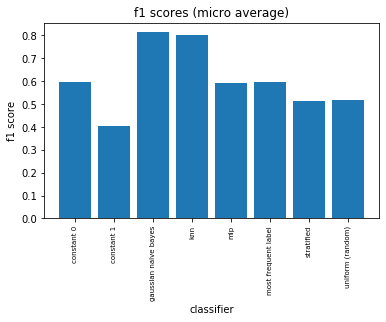

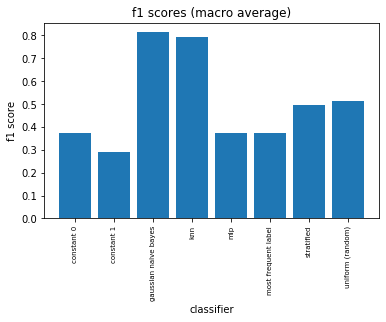

In [ ]:
plot_bar_chart(fmicro, 'f1 scores (micro average)', 'classifier', 'f1 score', 2)
plot_bar_chart(fmacro, 'f1 scores (macro average)', 'classifier', 'f1 score', 2)

Βλέπουμε πως ακόμα και με default παραμέτρους ο ταξινομητής mlp έχει συχνά -όχι όμως πάντα- (ακόμα και μόνο με ένα κρυμμένο επίπεδο) την καλύτερη απόδοση με βάση και τις δύο μετρικές f1. Επίσης υψηλές τιμές μετρικών έχουν πάντα ο gnb και έπειτα ο knn.
Οι dummy ταξινομητές δεν μπορούν να ανταγωνιστούν στην απόδοση τους τους knn και gnb, κάτι που περιμέναμε σε αυτό το μεγάλου μεγέθους dataset.



##Δ. Βελτιστοποίηση ταξινομητών

###knn,gnb optimization (&dummy)

Διαδοχικά search spaces, και βέλτιστες τιμές υπερπαραμέτρων:


*   vthreshold = [0, 600, 1200],n_components = [13],k = [1, 5, 11, 21, 31, 41]
    *   gnb: vthres=0, f1 micro=0.81 , accuracy=0.81
    *   knn: vthres=0, k=11, f1micro=0.91, accuracy=0.91


*   vthreshold=[0], n_components=range(2,13) , k=range(1,50) peritta

    *  gnb: pca=3, f1 micro=0.87
  *   knn: pca=12, k=19, f1 micro=0.92













Αρχικοποιούμε τους μετασχηματιστές για την προεπεξεργασία και τους ταξινομητές dummy, knn, και gnb.
Δημιουργούμε pipelines (και για τον mlp) και ορίζουμε τιμές των παραμέτρων για βελτιστοποίηση.

In [ ]:
!pip install --upgrade imbalanced-learn
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # ή minmax scaler που πάει πριν την επιλογή χαρακτηριστικών
from imblearn.over_sampling import RandomOverSampler #ή undersampling
from sklearn.decomposition import PCA

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()

#Αρχικοποιούμε τους ταξινομητές
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")
gnb = GaussianNB()
knn = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
clf = MLPClassifier(hidden_layer_sizes=1)

#ορίζουμε pipelines
Pipelines = {}
Pipelines['dc_uniform'] = Pipeline([('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dc_uniform',dc_uniform)])
Pipelines['dc_constant_0'] = Pipeline([('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dc_constant_0',dc_constant_0)])
Pipelines['dc_constant_1'] = Pipeline([('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dc_constant_1',dc_constant_1)])
Pipelines['dc_most_frequent'] = Pipeline([('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dc_most_frequent',dc_most_frequent)])
Pipelines['dc_stratified'] = Pipeline([('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dc_stratified',dc_stratified)])
Pipelines['naive_bayes'] = Pipeline([('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('naive_bayes',gnb)])
Pipelines['knn'] = Pipeline([('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('knn',knn)])
Pipelines['mlp'] = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),('mlp', clf)], memory='mlp')

#Δήλωση των παραμέτρων και των διαστημάτων στα οποία αυτές ανήκουν
#Τσεκάρουμε το variance των μεταβλητών
#train_variance = train.var(axis=0)
#print(train_variance)
#print(np.max(train_variance))

#Παράμετρος του selector
vthreshold = [0]

#Παράμετρος PCA
n_components = list(range(2,13))

#Παράμετροι του knn
myList=list(range(1,50))
k = list(filter(lambda x: x % 2!=0, myList)) # η υπερπαράμετρος του ταξινομητή
weight_options=['uniform', 'distance']
metric_options=['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean','mahalanobis']


#scores
f_scores = ['f1_micro', 'f1_macro']


Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.6.1)


In [ ]:
#παράμετροι mlp
import numpy as np
activation_options=['identity', 'logistics', 'tanh', 'relu']
solver_options=['lbfgs', 'sgd', 'adam']
max_iter_options=list(range(230,350,20))
learning_rate_options=['constant', 'invscaling', 'adaptive']
alpha_options=list(np.arange(0.0001,0.0003, 0.00003))

Ορίζουμε το Gridsearch για κάθε ταξινομητή.

In [ ]:
from sklearn.model_selection import GridSearchCV
cv_num=5
estimators = {}

# Βρόχος βελτιστοποίησης των ταξινομητών
for fscore in f_scores:
    estimators['uniform (random)'] = GridSearchCV(Pipelines['dc_uniform'], dict(selector__threshold=vthreshold, pca__n_components=n_components),
                                        cv=cv_num, scoring=fscore, refit=fscore, n_jobs=-1)

    estimators['constant 0'] = GridSearchCV(Pipelines['dc_constant_0'], dict(selector__threshold=vthreshold, pca__n_components=n_components),
                                        cv=cv_num, scoring=fscore, refit=fscore, n_jobs=-1)

    estimators['constant 1'] = GridSearchCV(Pipelines['dc_constant_1'], dict(selector__threshold=vthreshold, pca__n_components=n_components),
                                        cv=cv_num, scoring=fscore, refit=fscore, n_jobs=-1)

    estimators['most frequent label'] = GridSearchCV(Pipelines['dc_most_frequent'], dict(selector__threshold=vthreshold, pca__n_components=n_components),
                                        cv=cv_num, scoring=fscore, refit=fscore, n_jobs=-1)

    estimators['stratified'] = GridSearchCV(Pipelines['dc_stratified'], dict(selector__threshold=vthreshold, pca__n_components=n_components),
                                        cv=cv_num, scoring=fscore, refit=fscore, n_jobs=-1)

    estimators['gaussian naive bayes'] = GridSearchCV(Pipelines['naive_bayes'], dict(selector__threshold=vthreshold, pca__n_components=n_components),
                                        cv=cv_num, scoring=fscore, refit=fscore, n_jobs=-1)

    estimators['knn'] = GridSearchCV(Pipelines['knn'], dict(selector__threshold=vthreshold, pca__n_components=n_components, knn__n_neighbors=k, knn__weights=weight_options,
                                        knn__metric=metric_options),cv=cv_num, scoring=fscore, refit=fscore, n_jobs=-1)

    estimators['mlp'] = GridSearchCV(Pipelines['mlp'], dict(selector__threshold=vthreshold, pca__n_components=n_components, mlp__activation=activation_options, mlp__solver=solver_options, mlp__max_iter=max_iter_options, mlp__learning_rate=learning_rate_options, mlp__alpha=alpha_options), cv=5, scoring=fscore, n_jobs=-1)


Για κάθε estimator (εκτός από mlp):

*   Γίνεται εκτίμηση του χρόνου για το τελικό fit & predict
*   Υπολογίζονται (και στη συνέχεια εκτυπώνονται) confusion matrix, f1-micro average και f1-macro average

In [ ]:
# Εκπαίδευση των ταξινομητών στο data_set (όλοι εκτός από τον mlp)
import time
preds={}

In [ ]:
for est in estimators:
  if est=='mlp':
    continue
  else:
    start = time.time()
    print (est)
    estimators[est].fit(train, train_labels)
    end = time.time()
    print ("Fit took %s seconds" % (end-start))
    start= time.time()
    preds[est]=estimators[est].predict(test)
    end=time.time()
    print("Predict took %s seconds" % (end-start))
    get_scores(est,preds[est])
    print(estimators[est].best_estimator_)
    print(estimators[est].best_params_)
    print("Accuracy score:\n")
    print(est, "\n", spam_accuracy[est])
    print("Confusion matrix:\n")
    print(est, "\n", cnf_matrix[est])
    print("\n")
    print("precision,recall,f1 micro average:\n")
    print(est, fmicro[est])
    print("\n")
    print("precision,recall,f1 macro average:\n")
    print(est, fmacro[est])
    print("\n")



uniform (random)
Fit took 1.1486480236053467 seconds
Predict took 0.002315521240234375 seconds
Pipeline(memory=None,
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dc_uniform',
                 DummyClassifier(constant=None, random_state=None,
                                 strategy='uniform'))],
         verbose=False)
{'pca__n_components': 10, 'selector__threshold': 0}
Accuracy score:

uniform (random) 
 0.49312092686459086
Confusion matrix:

uniform (random) 
 [[387 435]
 [265 294]]


precision,recall,f1 mic

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fit took 1.1753582954406738 seconds
Predict took 0.0020248889923095703 seconds
Pipeline(memory=None,
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dc_constant_1',
                 DummyClassifier(constant=1, random_state=None,
                                 strategy='constant'))],
         verbose=False)
{'pca__n_components': 2, 'selector__threshold': 0}
Accuracy score:

constant 1 
 0.4047791455467053
Confusion matrix:

constant 1 
 [[  0 822]
 [  0 559]]


precision,recall,f1 micro average:

constant 1 (0.404

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fit took 1.1873886585235596 seconds
Predict took 0.0021200180053710938 seconds
Pipeline(memory=None,
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dc_most_frequent',
                 DummyClassifier(constant=None, random_state=None,
                                 strategy='most_frequent'))],
         verbose=False)
{'pca__n_components': 2, 'selector__threshold': 0}
Accuracy score:

most frequent label 
 0.5952208544532948
Confusion matrix:

most frequent label 
 [[822   0]
 [559   0]]


precision,recall,f1 micr

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fit took 1.202533483505249 seconds
Predict took 0.00713038444519043 seconds
Pipeline(memory=None,
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=12,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dc_stratified',
                 DummyClassifier(constant=None, random_state=None,
                                 strategy='stratified'))],
         verbose=False)
{'pca__n_components': 12, 'selector__threshold': 0}
Accuracy score:

stratified 
 0.4887762490948588
Confusion matrix:

stratified 
 [[391 431]
 [275 284]]


precision,recall,f1 micro average:

stratified (0

Επειδή το mlp έχει περισσότερες παραμέτρους απαιτεί περισσότερο χρόνο, άρα το εξετάζουμε μόνο του.

###mlp optimization

Για τον mlp:

*   Γίνεται εκτίμηση του χρόνου για το τελικό fit & predict
*   Υπολογίζονται (και στη συνέχεια εκτυπώνονται) confusion matrix, f1-micro average και f1-macro average
Note: Τα bar plots που έχουν τυπωθεί έχουν τιμές από μη βελτιστοποιημένους και βελτιστοποιημένους ταξινομητές, δεν τα εξετάζουμε [δεν τα σβήνουμε επίσης καθώς το fit απαιτεί 8,5 ώρες] . Τα bar plots που μας ενδιαφέρουν φαίνονται παρακάτω

mlp
Fit took 31022.483772277832 seconds
Predict took 0.0029265880584716797 seconds
Pipeline(memory='mlp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=11,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('mlp',
                 MLPClassifie...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=1, learning_rate='adaptive',
                               learning_rate_init=0.001, max_fun=15000,
                               

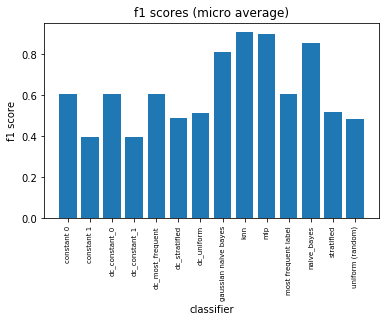

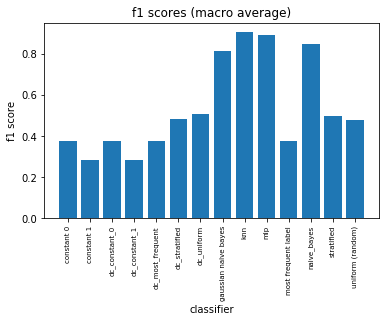

In [ ]:
import time
est='mlp'
start = time.time()
print (est)
estimators[est].fit(train, train_labels)
end = time.time()
print ("Fit took %s seconds" % (end-start))
start= time.time()
preds[est]=estimators[est].predict(test)
end=time.time()
print("Predict took %s seconds" % (end-start))
get_scores(est,preds[est])
print(estimators[est].best_estimator_)
print(estimators[est].best_params_)
print("Accuracy score:\n")
print(est, "\n", spam_accuracy[est])
print("Confusion matrix:\n")
print(est, "\n", cnf_matrix[est])
print("\n")
print("precision,recall,f1 micro average:\n")
print(est, fmicro[est])
print("\n")
print("precision,recall,f1 macro average:\n")
print(est, fmacro[est])
print("\n")

###Πίνακας με χρόνους εκτέλεσης (σε sec)

In [ ]:
data = {'Fit':[1.195209, 1.175358, 1.230974,  937.7526, 31022.48, 1.187389, 1.202533, 1.148648], 'Predict':[0.013617, 0.002025, 0.002629, 0.216660, 0.002927, 0.002120, 0.007130, 0.002316]}
df = pd.DataFrame(data, index =['constant 0', 'constant 1', 'gaussian naive bayes', 'knn', 'mlp', 'most frequent label', 'stratified', 'uniform'])
print(df)

                               Fit   Predict
constant 0                1.195209  0.013617
constant 1                1.175358  0.002025
gaussian naive bayes      1.230974  0.002629
knn                     937.752600  0.216660
mlp                   31022.480000  0.002927
most frequent label       1.187389  0.002120
stratified                1.202533  0.007130
uniform                   1.148648  0.002316


Φυσικά το fit του GridSearchCV απαιτεί σημαντικά περισσότερο χρόνο από το predict, καθώς πραγματοποιείται **fit** για όλους τους συνδυασμούς υπερπαραμέτρων . Όσο περισσότερες παραμέτρους έχουμε (άρα μεγαλύτερο grid), τόσο περισσότερος χρόνος απαιτείται. </br>
Είναι λοιπόν λογικό να αργεί περισσότερο ο mlp και έπειτα o knn , που εκτός από τις παραμέτρους για την προεπεξεργασία έχουν και δικές τους παραμέτρους για βελτιστοποίηση.
</br> **Predict** γίνεται στο test set με τον estimator με τις καλύτερες παραμέτρους όπως υπολογίστηκαν στο fit, επομένως γίνεται σε λιγότερο από 1 sec.

###Bar plot σύγκρισης με τις τιμές του κάθε f1 για όλους τους βελτιστοποιημένους classifiers.

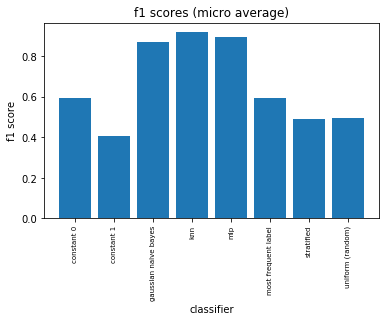

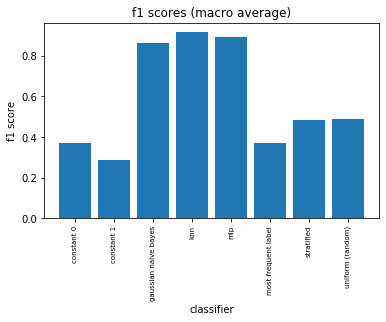

In [ ]:
plot_bar_chart(fmicro, 'f1 scores (micro average)', 'classifier', 'f1 score', 2)
plot_bar_chart(fmacro, 'f1 scores (macro average)', 'classifier', 'f1 score', 2)

Παρατηρούμε πως καλύτερη απόδοση με βάση και τα 2 averaged f1 scores έχει ο knn, ενώ ακολουθούν ο mlp και ο gnb. Οι dummy έχουν αρκετά χαμηλότερες τιμές f1.

###Πίνακας μεταβολής επίδοσης (accuracy score)


In [ ]:
data = {'Before':[0.5952208544532948, 0.4047791455467053, 0.8153511947863866, 0.8030412744388125, 0.5930485155684286, 0.5952208544532948, 0.5148443157132513, 0.5162925416364953],
        'After':[0.5952208544532948, 0.4047791455467053, 0.8682114409847936, 0.9203475742215785, 0.8957277335264301,  0.5952208544532948, 0.4887762490948588, 0.49312092686459086]}
df = pd.DataFrame(data, index =['constant 0', 'constant 1', 'gaussian naive bayes', 'knn', 'mlp', 'most frequent label', 'stratified', 'uniform'])
print(df)

                        Before     After
constant 0            0.595221  0.595221
constant 1            0.404779  0.404779
gaussian naive bayes  0.815351  0.868211
knn                   0.803041  0.920348
mlp                   0.593049  0.895728
most frequent label   0.595221  0.595221
stratified            0.514844  0.488776
uniform               0.516293  0.493121


Φυσικά η επίδοση των constant 0, 1 και most frequent label δεν μεταβάλλεται καθώς αυτοί οι ταξινομητές κάνουν πάντοτε την ίδια πρόβλεψη. Επομένως η επίδοσή τους εξαρτάται μόνο από τον αριθμό δειγμάτων κάθε κλάσης στο dataset. </br>
Σημειώνεται επίσης πως οι ταξινομητές δεν έχουν για κάθε fit ακριβώς ίδια επίδοση. </br>
Βλέπουμε στον gnb και τον knn αρκετή βελτίωση στην ακρίβεια της πρόβλεψης, γεγονός που υπογραμμίζει την σημασία τόσο της προεπεξεργασίας, όσο και της επιλογής των καταλληλότερων παραμέτρων για το κάθε dataset (αυτό αφορά τον knn). </br>
Βλέπουμε πολύ μεγάλη βελτίωση στον mlp με το ένα κρυμμένο επίπεδο, δεν θα ήταν βέβαια πάντα τόσο μεγάλη η διαφορά, καθώς η επίδοση του default αλλάζει αρκετά.
